### Data Cleaning
In this notebook we use separate python scripts to clean our data.

Let's start with loading our olympics dataset.

In [1]:
import matplotlib.pyplot as plt
import olympics

In [2]:
ol_data = olympics.clean_data()

In [3]:
ol_data

,Country,Summer_Games,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Games,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Games_Total,Games_Gold,Games_Silver,Games_Bronze,Combined_Total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
142,Independent Olympic Participants (IOP) [IOP],1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
143,Zambia (ZAM) [ZAM],12,0,1,1,2,0,0,0,0,0,12,0,1,1,2
144,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8


Let's find out which ten countries have won the most medals overall and create a bar chart to represent it.

To do that we can use the **loc** method which accepts rows and columns as filters. We can use slices eg.: loc[3:5, 1:3] or boolean expressions eg.: loc[data.loc[:,'Combined_Total'] > 400].

In [61]:
medals_per_country = ol_data.loc[:,['Country', 'Combined_Total']]

In [62]:
medals_per_country

,Country,Combined_Total
0,Afghanistan (AFG),2
1,Algeria (ALG),15
2,Argentina (ARG),70
3,Armenia (ARM),12
4,Australasia (ANZ) [ANZ],12
...,...,...
141,Yugoslavia (YUG) [YUG],87
142,Independent Olympic Participants (IOP) [IOP],3
143,Zambia (ZAM) [ZAM],2
144,Zimbabwe (ZIM) [ZIM],8


Let's also use the **Country** column as our index. It will make it easy to create a plot.

In [63]:
medals_per_country.set_index('Country', inplace=True)
medals_per_country

,Combined_Total
Country,
Afghanistan (AFG),2
Algeria (ALG),15
Argentina (ARG),70
Armenia (ARM),12
Australasia (ANZ) [ANZ],12
...,...
Yugoslavia (YUG) [YUG],87
Independent Olympic Participants (IOP) [IOP],3
Zambia (ZAM) [ZAM],2


Next, we need to sort our data and select the top ten results. 

In [64]:
sorted_medals = medals_per_country.sort_values('Combined_Total', ascending=False)
sorted_medals

,Combined_Total
Country,
United States (USA) [P] [Q] [R] [Z],2681
Soviet Union (URS) [URS],1204
Great Britain (GBR) [GBR] [Z],806
Germany (GER) [GER] [Z],782
France (FRA) [O] [P] [Z],780
...,...
Ivory Coast (CIV) [CIV],1
Gabon (GAB),1
Eritrea (ERI),1


In [65]:
sorted_medals = sorted_medals[sorted_medals['Combined_Total']>500]

In [66]:
sorted_medals

,Combined_Total
Country,
United States (USA) [P] [Q] [R] [Z],2681
Soviet Union (URS) [URS],1204
Great Britain (GBR) [GBR] [Z],806
Germany (GER) [GER] [Z],782
France (FRA) [O] [P] [Z],780
Italy (ITA) [M] [S],663
Sweden (SWE) [Z],627
China (CHN) [CHN],526
Russia (RUS) [RUS],519


We can make the bars in our chart different colors depending on the value they represent. Below we create a color list for **bar** chart. Each subsequent color is going to be less saturated.

In [67]:
color_list = [(1-0.05*i, 0.4, 0.5) for i in range(len(sorted_medals))]
color_list

[(1.0, 0.4, 0.5),
 (0.95, 0.4, 0.5),
 (0.9, 0.4, 0.5),
 (0.85, 0.4, 0.5),
 (0.8, 0.4, 0.5),
 (0.75, 0.4, 0.5),
 (0.7, 0.4, 0.5),
 (0.6499999999999999, 0.4, 0.5),
 (0.6, 0.4, 0.5),
 (0.55, 0.4, 0.5)]

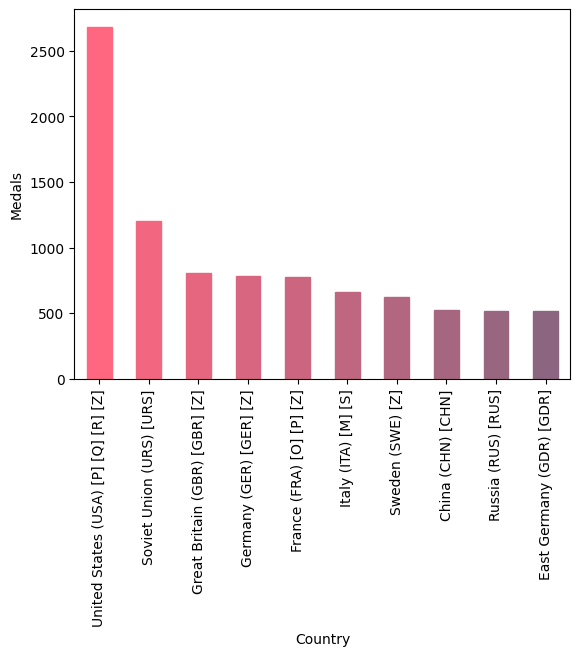

In [68]:
ax = sorted_medals.plot(kind='bar')
ax.set_ylabel("Medals")
ax.get_legend().remove()
for i, bar in enumerate(ax.patches):
    bar.set_color(color_list[i])

We are now going to explore our second dataset. This dataset contains names of universities in the United States together with the cities and states they are in.

In [2]:
import universities

In [58]:
data = universities.clean_data()

In [59]:
data

,State,Town,University
0,Alabama,Auburn,Auburn University
1,Alabama,Florence,University of North Alabama
2,Alabama,Jacksonville,Jacksonville State University
3,Alabama,Livingston,University of West Alabama
4,Alabama,Montevallo,University of Montevallo
...,...,...,...
736,Wisconsin,River Falls,University of Wisconsin–River Falls
737,Wisconsin,Stevens Point,University of Wisconsin–Stevens Point
738,Wisconsin,Waukesha,Carroll University
739,Wisconsin,Whitewater,University of Wisconsin–Whitewater


Our data cleaning script has done a lot of work and our data is nearly ready. You can see, however, that there are still some artefacts left. If we go to rows 27 and 28 we will see that in certain cases instead of the name of the university we have the name of the town again. A result of how the data was stored in some rows and our initial approach to clean them in our script.

In [64]:
data.loc[:,['Town', 'University']]

,Town,University
0,Auburn,Auburn University
1,Florence,University of North Alabama
2,Jacksonville,Jacksonville State University
3,Livingston,University of West Alabama
4,Montevallo,University of Montevallo
...,...,...
736,River Falls,University of Wisconsin–River Falls
737,Stevens Point,University of Wisconsin–Stevens Point
738,Waukesha,Carroll University
739,Whitewater,University of Wisconsin–Whitewater


A good approach would be to select all rows where the university name is part of the respective town field and then remove them. If we take a look at those rows we can see that there are no 'false positives'.

In [66]:
data[data.apply(lambda x: x['University'].strip() in x['Town'], axis=1)]

,State,Town,University
28,California,Berkeley,Berkeley
30,California,Chico,Chico
41,California,Davis,Davis
43,California,Irvine,Irvine
48,California,Merced,Merced
55,California,Riverside,Riverside
59,California,Sacramento,Sacramento
61,California,"University District, San Bernardino",San Bernardino
64,California,San Diego,San Diego
70,California,Santa Barbara,Santa Barbara


In [67]:
data = data[data.apply(lambda x: x['University'].strip() not in x['Town'], axis=1)]

In [68]:
data

,State,Town,University
0,Alabama,Auburn,Auburn University
1,Alabama,Florence,University of North Alabama
2,Alabama,Jacksonville,Jacksonville State University
3,Alabama,Livingston,University of West Alabama
4,Alabama,Montevallo,University of Montevallo
...,...,...,...
736,Wisconsin,River Falls,University of Wisconsin–River Falls
737,Wisconsin,Stevens Point,University of Wisconsin–Stevens Point
738,Wisconsin,Waukesha,Carroll University
739,Wisconsin,Whitewater,University of Wisconsin–Whitewater
